In [3]:
import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [4]:
def data_in():
    
    ''' Takes in data from the CSV, gets the relevant data, and returns a dataframe '''
    
    df = pd.read_csv('ProblemCData.csv')
    material_codes = ['FFTCB', 'PATCB', 'EMTCB', 'MGTCB', 'JFTCB', 'NGTCB','CLTCB','WWTCB', 'DFTCB', 'RFTCB','NUEGB','RETCB','HYTCB','GETCB','SOTCB','WYTCB', 'BMTCB'] # list of material codes from excel[]

    data = df.loc[df['MSN'].isin(material_codes)]
    return data


In [17]:
def get_state_data_for_plotting(state1):
    state = state1
    df = data_in()
    data1 = df[df.loc[:, 'StateCode'] == state]
    # Get their data for the relevant columns as a series over all the years

    data = data1.filter(items=['Year', 'MSN', 'Data']).set_index(['Year'])
    # print(data)

    dfPA = data[data.loc[:, 'MSN'] == 'PATCB']
    dfEM = data[data.loc[:, 'MSN'] == 'EMTCB']
    dfJF = data[data.loc[:, 'MSN'] == 'JFTCB']
    dfMG = data[data.loc[:, 'MSN'] == 'MGTCB']
    dfRF = data[data.loc[:, 'MSN'] == 'RFTCB']
    dfDF = data[data.loc[:, 'MSN'] == 'DFTCB']
    petro = dfPA.loc[:, 'Data'] + dfEM.loc[:, 'Data'] + dfJF.loc[:, 'Data'] + dfMG.loc[:, 'Data'] + dfRF.loc[:,
                                                                                                    'Data'] + dfDF.loc[
                                                                                                              :, 'Data']

    dfNG = data[data.loc[:, 'MSN'] == 'NGTCB']
    natural_gas = dfNG.loc[:, 'Data']

    dfCoal = data[data.loc[:, 'MSN'] == 'CLTCB']
    dataCoal = dfCoal.loc[:, 'Data']

    dfWood = data[data.loc[:, 'MSN'] == 'WWTCB']
    dataWood = dfWood.loc[:, 'Data']
    coal_wood = dataCoal + dataWood

    dfNuc = data[data.loc[:, 'MSN'] == 'NUEGB']
    nuclear = dfNuc.loc[:, 'Data']

    dfWind = data[data.loc[:, 'MSN'] == 'WYTCB']
    wind = dfWind.loc[:, 'Data']

    dfSol = data[data.loc[:, 'MSN'] == 'SOTCB']
    solar = dfSol.loc[:, 'Data']

    dfHydro = data[data.loc[:, 'MSN'] == 'HYTCB']
    hydro = dfHydro.loc[:, 'Data']

    dfGeo = data[data.loc[:, 'MSN'] == 'GETCB']
    geo = dfGeo.loc[:, 'Data']

    dfBio = data[data.loc[:, 'MSN'] == 'BMTCB']
    bio = dfBio.loc[:, 'Data']

    data_labels = ['petro', 'natural_gas', 'coal_wood', 'nuclear', 'wind', 'solar', 'hydro', 'geo', 'bio']
    data_values = [petro, natural_gas, coal_wood, nuclear, wind, solar, hydro, geo, bio]
    dataf = pd.DataFrame(index = data_labels, data=data_values)

    return dataf

#get_state_data_for_plotting('CA')

In [18]:
def get_materials_numbers(data):
    
    ''' Aggregate the data from different specific energy sources into general sources'''
    
    dfPA = data[data.loc[:, 'MSN']== 'PATCB']
    dfEM = data[data.loc[:, 'MSN']== 'EMTCB']
    dfJF = data[data.loc[:, 'MSN']== 'JFTCB']
    dfMG = data[data.loc[:, 'MSN']== 'MGTCB']
    dfRF = data[data.loc[:, 'MSN']== 'RFTCB']
    dfDF = data[data.loc[:, 'MSN']== 'DFTCB']
    petro = dfPA.loc[:, 'Data'].values + dfEM.loc[:, 'Data'].values + dfJF.loc[:, 'Data'].values + dfMG.loc[:, 'Data'].values + dfRF.loc[:, 'Data'].values + dfDF.loc[:, 'Data'].values

    dfNG = data[data.loc[:, 'MSN']== 'NGTCB']
    natural_gas = dfNG.loc[:, 'Data'].values
    
    dfCoal = data[data.loc[:, 'MSN']== 'CLTCB']
    dfWood = data[data.loc[:, 'MSN']== 'WWTCB'] 
    coal_wood = dfCoal.loc[:, 'Data'].values + dfWood.loc[:, 'Data'].values 
    
    dfNuc = data[data.loc[:, 'MSN']== 'NUEGB'] 
    nuclear = dfNuc.loc[:, 'Data'].values
    
    dfWind = data[data.loc[:, 'MSN']== 'WYTCB'] 
    wind = dfWind.loc[:, 'Data'].values
    
    dfSol = data[data.loc[:, 'MSN']== 'SOTCB'] 
    solar = dfSol.loc[:, 'Data'].values
    
    dfHydro = data[data.loc[:, 'MSN']== 'HYTCB'] 
    hydro = dfHydro.loc[:, 'Data'].values
    
    dfGeo = data[data.loc[:, 'MSN']== 'GETCB'] 
    geo = dfGeo.loc[:, 'Data'].values
    
    dfBio = data[data.loc[:, 'MSN']== 'BMTCB'] 
    bio = dfBio.loc[:, 'Data'].values
    
    total = petro + natural_gas + coal_wood + nuclear + wind + solar + hydro + geo + bio
    
    data_values = [petro, natural_gas, coal_wood, nuclear, wind, solar, hydro, geo, bio, total]
    return data_values
    
#get_materials_numbers(data)

In [19]:
def state_df(df, state):
    
    ''' Get data for a single state and return the dataframe '''
    
    state_df = df[df['StateCode']== state]
    return state_df

def year_df(df, year):
    
    ''' Get data for a single year and return the dataframe '''
    
    year_df = df[df['Year']== year]
    return year_df


In [20]:
def make_profile_df_unrefined(df):
    
    ''' Prepare the data to make energy profile for a given state in a given year
        :param dataframe in the form dfStateYear
        :returns df, which each cell is populated by a list'''
    
    data_abs = get_materials_numbers(df)
    total = sum(data_abs)
    
    data_rel = []
    for i in range(len(data_abs)):
        data_rel.append((data_abs[i] / total) *2)
    materials = ['Petroleum and Oil', 'Natural Gas', 'Coal and Wood', 'Nuclear', 'Wind', 'Solar', 'Hydroelectric', 'Geothermal', 'Biomass', 'total']
    inputs = {'Usage in BTUs': data_abs, 'Percenage of Total Energy Consumed': data_rel}
    data = pd.DataFrame(inputs, index=materials)
    return data

#fd = make_profile_df_unrefined(dfCA2009)
#fd

In [21]:
def turn_profile_df_lists_to_numbers(df):
    
    ''' Takes in a df in which each cell is populated by a list.
        Returns a df in which each cell is a float'''
    
    s = df.loc[:, 'Percenage of Total Energy Consumed']
    percentage_list = []
    for x in s:
        percentage_list.extend(x*100)

    t = fd.loc[:, 'Usage in BTUs']
    usage_list = []
    for y in t:
        usage_list.extend(y)
    return usage_list, percentage_list

#usage_list, percentage_list = turn_profile_df_lists_to_numbers(fd)

In [22]:
def make_profile_df(usage_list, percentage_list):
    
    ''' Returns a profile for a states energy use in a year as a dataframe'''
    
    pd.options.display.float_format = '{:,.2f}'.format
     
    materials = ['Petroleum and Oil', 'Natural Gas', 'Coal and Wood', 'Nuclear', 'Wind', 'Solar', 'Hydroelectric', 'Geothermal', 'Biomass', 'Total']
    inputs = {'Usage in BTUs': usage_list, 'Percentage of Total Energy Consumed': percentage_list}
    data = pd.DataFrame(inputs, index=materials).sort_values(by=['Percentage of Total Energy Consumed'], ascending=False)
    data.columns.name = 'California Energy Profile for 2009'

    return data

#dfCA2009_profile = make_profile_df(usage_list, percentage_list)
#dfCA2009_profile.name = 'California 2009 Profile'
#dfCA2009_profile.plot.line()



In [23]:
# Plot relative sources of energy used in a given state for a given year
def plot_sources_pie(df):
    
    ''' Create a pie chart for energy sources for a given state in a given year '''

    profile_df = make_profile_df(df)
    percentages = profile_df.loc[:, 'Percentage of Total Energy Consumed']
    #print(percentages)
    
    materials = ['Petroleum and Oil', 'Natural Gas', 'Coal and Wood', 'Nuclear', 'Wind', 'Solar', 'Other']
    print('Where Other is Hydroelectric, Geothermal, & Biomass')
    colors = ['red', 'red', 'red', 'red', 'green', 'green', 'green']
    scaling = 5
    
    sizes = [item*scaling for item in percentages[:-1]]
    print(len(sizes))
    # TODO switch out the sizes and use the one representing the actual data
    
    #sizes = proportion * scaling
    #sizes = [215, 130, 245, 210, 215, 130, 245, 210]
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=materials, colors=colors,
            autopct='%5.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

In [24]:
def plot_df(df):
    
    ''' Not sure if I still need this method '''
    
    ax = plt.subplot(111) #, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis

    table(ax, df)  # where df is your data frame

    plt.show(table)
    


In [25]:
def get_state_profiles_2009(state):
    
    ''' For a given state, show their energy profile in 2009'''
    
    df = data_in()
    make_profile_df_unrefined(df)
    make
    state_df(state)
    year_df(2009)
    get_materials_numbers(df)
    plot_df()
    plot_sources_pi()

    

In [82]:
def get_state_data_for_plotting0(state1):
    state = state1
    df = data_in()
    data1 = df[df.loc[:, 'StateCode'] == state]
    # Get their data for the relevant columns as a series over all the years

    data = data1.filter(items=['Year', 'MSN', 'Data']).set_index(['Year'])
    # print(data)

    dfPA = data[data.loc[:, 'MSN'] == 'PATCB']
    dfEM = data[data.loc[:, 'MSN'] == 'EMTCB']
    dfJF = data[data.loc[:, 'MSN'] == 'JFTCB']
    dfMG = data[data.loc[:, 'MSN'] == 'MGTCB']
    dfRF = data[data.loc[:, 'MSN'] == 'RFTCB']
    dfDF = data[data.loc[:, 'MSN'] == 'DFTCB']
    petro = dfPA.loc[:, 'Data'] + dfEM.loc[:, 'Data'] + dfJF.loc[:, 'Data'] + dfMG.loc[:, 'Data'] + dfRF.loc[:, 'Data'] + dfDF.loc[:, 'Data']

    dfNG = data[data.loc[:, 'MSN'] == 'NGTCB']
    natural_gas = dfNG.loc[:, 'Data']

    dfCoal = data[data.loc[:, 'MSN'] == 'CLTCB']
    dataCoal = dfCoal.loc[:, 'Data']

    dfWood = data[data.loc[:, 'MSN'] == 'WWTCB']
    dataWood = dfWood.loc[:, 'Data']
    coal_wood = dataCoal + dataWood

    dfNuc = data[data.loc[:, 'MSN'] == 'NUEGB']
    nuclear = dfNuc.loc[:, 'Data']

    dfWind = data[data.loc[:, 'MSN'] == 'WYTCB']
    wind = dfWind.loc[:, 'Data']

    dfSol = data[data.loc[:, 'MSN'] == 'SOTCB']
    solar = dfSol.loc[:, 'Data']

    dfHydro = data[data.loc[:, 'MSN'] == 'HYTCB']
    hydro = dfHydro.loc[:, 'Data']

    dfGeo = data[data.loc[:, 'MSN'] == 'GETCB']
    geo = dfGeo.loc[:, 'Data']

    dfBio = data[data.loc[:, 'MSN'] == 'BMTCB']
    bio = dfBio.loc[:, 'Data']
    
    renewable = wind + solar + hyrdro + geo + bio
    nonrenewable = petro + natural_gas + coal_wood + nuclear

    data_labels = ['petro', 'natural_gas', 'coal_wood', 'nuclear', 'wind', 'solar', 'hydro', 'geo', 'bio', 'renewable', 'nonrenewable']
    data_values = [petro, natural_gas, coal_wood, nuclear, wind, solar, hydro, geo, bio, renewable, nonrenewable]
    
    dataf = pd.DataFrame(index = data_labels, data=data_values)

    return dataf

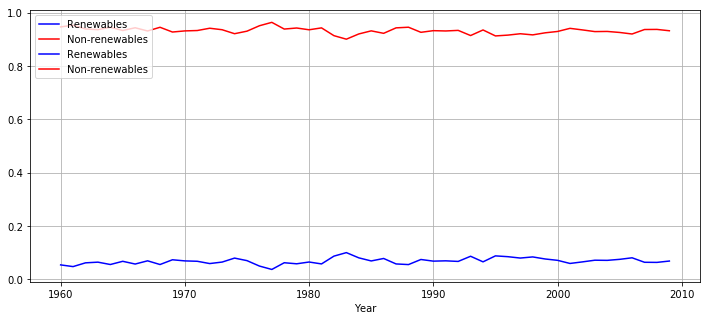

In [85]:
def plot_split_over_time(state1):
    state = state1
    df = data_in()
    data1 = df[df.loc[:, 'StateCode'] == state]
    # Get their data for the relevant columns as a series over all the years

    data = data1.filter(items=['Year', 'MSN', 'Data']).set_index(['Year'])
    # print(data)

    dfPA = data[data.loc[:, 'MSN'] == 'PATCB']
    dfEM = data[data.loc[:, 'MSN'] == 'EMTCB']
    dfJF = data[data.loc[:, 'MSN'] == 'JFTCB']
    dfMG = data[data.loc[:, 'MSN'] == 'MGTCB']
    dfRF = data[data.loc[:, 'MSN'] == 'RFTCB']
    dfDF = data[data.loc[:, 'MSN'] == 'DFTCB']
    petro = dfPA.loc[:, 'Data'] + dfEM.loc[:, 'Data'] + dfJF.loc[:, 'Data'] + dfMG.loc[:, 'Data'] + dfRF.loc[:, 'Data'] + dfDF.loc[:, 'Data']

    dfNG = data[data.loc[:, 'MSN'] == 'NGTCB']
    natural_gas = dfNG.loc[:, 'Data']

    dfCoal = data[data.loc[:, 'MSN'] == 'CLTCB']
    dataCoal = dfCoal.loc[:, 'Data']

    dfWood = data[data.loc[:, 'MSN'] == 'WWTCB']
    dataWood = dfWood.loc[:, 'Data']
    coal_wood = dataCoal + dataWood

    dfNuc = data[data.loc[:, 'MSN'] == 'NUEGB']
    nuclear = dfNuc.loc[:, 'Data']

    dfWind = data[data.loc[:, 'MSN'] == 'WYTCB']
    wind = dfWind.loc[:, 'Data']

    dfSol = data[data.loc[:, 'MSN'] == 'SOTCB']
    solar = dfSol.loc[:, 'Data']

    dfHydro = data[data.loc[:, 'MSN'] == 'HYTCB']
    hydro = dfHydro.loc[:, 'Data']

    dfGeo = data[data.loc[:, 'MSN'] == 'GETCB']
    geo = dfGeo.loc[:, 'Data']

    dfBio = data[data.loc[:, 'MSN'] == 'BMTCB']
    bio = dfBio.loc[:, 'Data']

    renewables = wind + solar + hydro + geo + bio
    nonrenewables = petro + natural_gas + coal_wood + nuclear
    
    data_labels = ['Renewables', 'Non-renewables']
    data_values = [renewables, nonrenewables]

    dataf = pd.DataFrame(index = data_labels, data=data_values)

    plt.figure(figsize=(12,5))
    plt.xlabel('Number of requests every 10 minutes')
    
    total = dataf.loc['Renewables', :] + dataf.loc['Non-renewables', :]
    
    ax1 = (dataf.loc['Renewables', :]/total).plot(color='blue', grid=True, label='Renewables')
    ax2 = (dataf.loc['Non-renewables', :]/total).plot(color='red', grid=True, label='Non-renewables')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

plot_split_over_time('CA')

In [50]:
df = get_state_data_for_plotting('CA')
petro_data = df.loc['petro', :]
natural_gas = df.loc['natural_gas', :]
petro_data.plot.line()
year_data = pd.Series(range(1960, 2009))

ts = pd.Series(petro_data, index=year_data)

#ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(natural_gas, index=ts.index, columns=list('ABCD'))
ts.plot()



NameError: name 'renewables' is not defined

In [ ]:
sr = pd.Series([1, 2, 3])
sr1 = pd.Series([2, 3, 4])
sr + sr1

In [2]:
df = get_state_data_for_plotting('CA')
petro_data = df.loc['petro', :]
natural_gas = df.loc['natural_gas', :]


#renewable =
#nonren = df.loc['natural_gas', :] + df.loc['petro', :] + 

ts = pd.Series(petro_data, index=year_data)

#ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(natural_gas, index=ts.index, columns=list('ABCD'))
#ts.plot()

plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = renewable.plot(color='blue', grid=True, label='Yearly Natural Gas Usage')
ax2 = nonren.plot(color='red', grid=True, secondary_y=True, label='Yearly Petro Usage')
#ax1 = df.A.plot(color='blue', grid=True, label='Count')
#ax2 = df.B.plot(color='red', grid=True, secondary_y=True, label='Sum')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

NameError: name 'get_state_data_for_plotting' is not defined

In [ ]:
# Get the values for 2009 for all the codes for all the states
df2009 = year_df(df, 2009)
df2009.name = '2009 Data'

dfCA = state_df(df, 'CA')
dfCA2009 = year_df(dfCA, 2009)
dfCA2009.name = 'California 2009 Data'

dfAZ = state_df(df, 'AZ')
dfAZ2009 = year_df(dfAZ, 2009)
dfAZ2009.name = 'Arizona 2009 Data'

dfNM = state_df(df, 'NM')
dfNM2009 = year_df(dfNM, 2009)
dfNM2009.name = 'New Mexico 2009 Data'

dfTX = state_df(df, 'TX')
dfTX2009 = year_df(dfTX, 2009)
dfTX2009.name = 'Texas 2009 Data'


In [75]:
#plot_sources_pie(dfCA2009)

In [87]:
def plot_state_sources_over_time(df):
    
    ''' Make a line chart showing a states relative use of renewable and non renewable energy'''

    
    plt.plot(year, ff_rel_use, color='red')
    plt.plot(year, rn_rel_use, color='green')
    plt.xlabel('Time')
    plt.ylabel('Percentage of Total Energy')
    plt.title('{State} use of energy over time')
    plt.show()

#plot_state_sources_over_time(df)

In [92]:
states = ['CA', 'AZ', 'NM', 'TX']
for dfStateYear in states:
    example = plot_sources_pie(dfStateYear)

TypeError: make_profile_df() missing 1 required positional argument: 'percentage_list'

In [ ]:
s = fd.loc[:, 'Percenage of Total Energy Consumed']
percentage_list = []
for x in s:
    percentage_list.extend(x*100)
    
t = fd.loc[:, 'Usage in BTUs']
usage_list = []
for y in t:
    usage_list.extend(y

In [422]:
# make a dataframe for each state that holds the energy categories
labels = ['Petroleum', 'Natural Gas', 'Coal and Wood', 'Wind', 'Solar', 'Hydroelectric', 'Geothermal', 'Biomass']
data = [1, 4, 6, 3, 67, 7, 7, 7]
df_mat_time = pd.DataFrame(data, labels)

# How can we get all slices of data for a state, for a given year, grab each of the things that matchthe codes and put them ino a vector

In [ ]:
dfDF = data[data.loc[:, 'MSN']== 'DFTCB']
#print(dfDF)
natural_gas = dfPA.loc[:, 'Data'].values

In [ ]:
petro_inputs = data[data.loc[:, 'MSN']== 'PATCB'], data[data.loc[:, 'MSN']== 'NGTCB'], data[data.loc[:, 'MSN']== 'NGTCB'] + data[data.loc[:, 'MSN']== 'NGTCB']
#petro = petro_inputs['Data']
#print(petro['Data'])


'''
natural_gas = data[data.loc[:, 'MSN']== 'NGTCB']] 
coal_wood = data.loc[:, 'MSN']== 'CLTCB'] + data.loc[:, 'MSN']== 'WWTCB']
nuclear = data.loc[:, 'MSN']== 'NUECB']
wind = data.loc[:, 'MSN']== 'WYTCB']
solar = data.loc[:, 'MSN']== 'SOTCB']
hydroelectric = data.loc[:, 'MSN']== 'HYTCB']
geothermal = data.loc[:, 'MSN']== 'GETCB']
biomass = data.loc[:, 'MSN']== 'BMTCB']
'''

In [ ]:
# Make df a dataframe that represents the summary data from excel in a way we can query nicely
#df_CA = data[data['StateCode']== 'CA']
#data[data['StateCode']== 'AZ']
#df9[df9['StateCode']== 'CA']

In [322]:
#df9['MSN'].astype(str).str[0:3].head()

In [335]:
#groupedCA = df9_CA.groupby(df9_CA['MSN'].astype(str).str[0:3]).sum().drop(columns ='Year')
#groupedAZ = df9_CA.groupby(df9_AZ['MSN'].astype(str).str[0:3]).sum().drop(columns ='Year')
#groupedNM = df9_CA.groupby(df9_NM['MSN'].astype(str).str[0:3]).sum().drop(columns ='Year')
#groupedTX = df9_CA.groupby(df9_TX['MSN'].astype(str).str[0:3]).sum().drop(columns ='Year')

In [337]:
'''
data_condensed = [data['PATCB'] + data['EMTCB'] + data['MGTCB'] + data['JFTCB'] + data['DFTCB'] + data['RFTCB'], 
                  data['NGTCB'],
                  data['CLTCB']  + data['WWTCB'],
                  data['NUEGB'],
                  data['WYTCB'],
                  data['SOTCB'],
                  data['HYTCB'],
                  data['GETCB'],
                  data['BMTCB']]
'''

"\ndata_condensed = [data['PATCB'] + data['EMTCB'] + data['MGTCB'] + data['JFTCB'] + data['DFTCB'] + data['RFTCB'], \n                  data['NGTCB'],\n                  data['CLTCB']  + data['WWTCB'],\n                  data['NUEGB'],\n                  data['WYTCB'],\n                  data['SOTCB'],\n                  data['HYTCB'],\n                  data['GETCB'],\n                  data['BMTCB']]\n"

In [408]:
#df9_CA['MSN'].astype(str).str[0:3].head()
#df9_CA = df9[df9['StateCode']== 'CA']
#df9_AZ = df9[df9['StateCode']== 'AZ']
#df9_NM = df9[df9['StateCode']== 'NM']
#df9_TX = df9[df9['StateCode']== 'TX']
#df9_CA.head(1)
#df9_CA_new = df9_CA[['Data']].sum(axis=1).where(df['MSN'].astype(str).str[0:3], 0)

In [90]:
# For each state, the energy profile for the year 2009
#make_profile_df(dfCA2009)
#make_profile_df(dfNM2009)
#make_profile_df(dfAZ2009)
#make_profile_df(dfTX2009)